In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./datasets/car_purchasing.csv')
df

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,USA,0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,USA,0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,USA,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,USA,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,USA,1,57,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...,...,...,...
495,Walter,ligula@Cumsociis.ca,USA,0,41,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,USA,1,38,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,USA,1,54,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,USA,1,59,49811.99062,14013.034510,337826.6382,45442.15353


In [3]:
df = df.drop(labels=['Customer Name','Customer e-mail', 'Country', 'Gender', 'Credit Card Debt'], axis=1)
df

,Age,Annual Salary,Net Worth,Car Purchase Amount
0,42,62812.09301,238961.2505,35321.45877
1,41,66646.89292,530973.9078,45115.52566
2,43,53798.55112,638467.1773,42925.70921
3,58,79370.03798,548599.0524,67422.36313
4,57,59729.15130,560304.0671,55915.46248
...,...,...,...,...
495,41,71942.40291,541670.1016,48901.44342
496,38,56039.49793,360419.0988,31491.41457
497,54,68888.77805,764531.3203,64147.28888
498,59,49811.99062,337826.6382,45442.15353


In [4]:
df = df.rename(columns={'Age': 'Age', 'Annual Salary': 'Annual', 'Net Worth': 'Net', 'Car Purchase Amount': 'Car'})

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     500 non-null    int64  
 1   Annual  500 non-null    float64
 2   Net     500 non-null    float64
 3   Car     500 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 15.8 KB


In [6]:
df.corr()['Car'].sort_values(ascending=False)[1:]

Age       0.633273
Annual    0.617862
Net       0.488580
Name: Car, dtype: float64

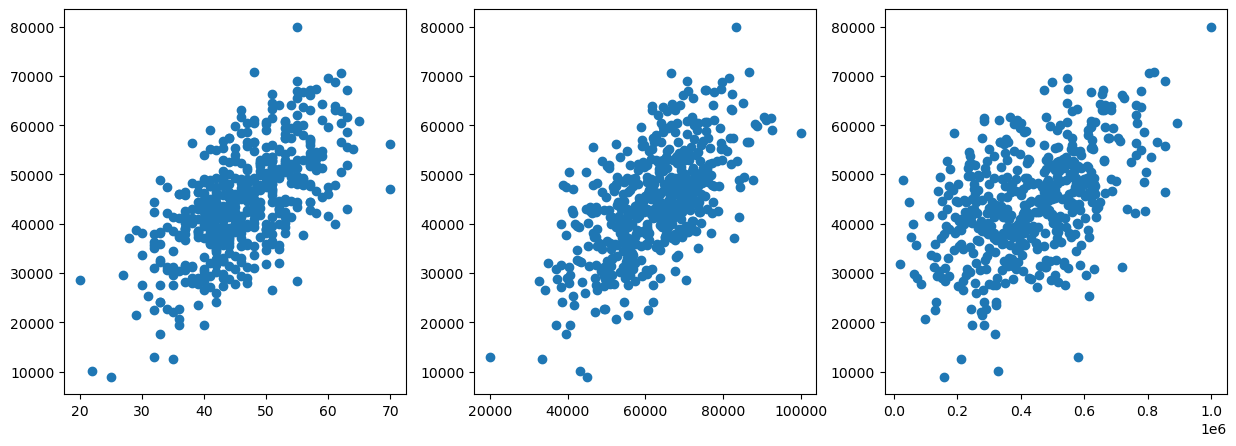

In [7]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].scatter(df['Age'], df['Car'])
axes[1].scatter(df['Annual'], df['Car'])
axes[2].scatter(df['Net'], df['Car'])
plt.show()

In [8]:
import torch
from torch.optim import SGD
from sklearn.model_selection import train_test_split

torch.manual_seed(124)
features, targets = df.iloc[:, :-1], df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

X_train1 = torch.FloatTensor(X_train.Age.values).view(-1, 1)
X_train2 = torch.FloatTensor(X_train.Annual.values).view(-1, 1)
X_train3 = torch.FloatTensor(X_train.Net.values).view(-1, 1)
y_train = torch.FloatTensor(y_train.values).view(-1, 1)

X_test1 = torch.FloatTensor(X_test.Age.values).view(-1, 1)
X_test2 = torch.FloatTensor(X_test.Annual.values).view(-1, 1)
X_test3 = torch.FloatTensor(X_test.Net.values).view(-1, 1)
y_test = torch.FloatTensor(y_test.values).view(-1, 1)

W1 = torch.zeros(1, requires_grad=True)
W2 = torch.zeros(1, requires_grad=True)
W3 = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

optimizer = SGD([W1, W2, W3, b], lr=0.0000000000000005)

epochs = 100000

for epoch in range(1, epochs + 1):
    H = W1 * X_train1 + W2 * X_train2 + W3 * X_train3 + b
    loss = torch.mean((y_train - H) ** 2)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 10000 == 0:
        print('{:4d}/{}: W1: {:.4f}, W2: {:.4f}, W3: {:.4f}, b: {:.4f}, loss: {:.4f}'\
              .format(epoch, epochs, W1.item(), W2.item(), W3.item(), b.item(), loss.item()))


10000/100000: W1: 0.0000, W2: 0.0132, W3: 0.0808, b: 0.0000, loss: 225885472.0000
20000/100000: W1: 0.0000, W2: 0.0174, W3: 0.0891, b: 0.0000, loss: 202490864.0000
30000/100000: W1: 0.0000, W2: 0.0206, W3: 0.0897, b: 0.0000, loss: 200295264.0000
40000/100000: W1: 0.0000, W2: 0.0237, W3: 0.0894, b: 0.0000, loss: 198368896.0000
50000/100000: W1: 0.0000, W2: 0.0268, W3: 0.0890, b: 0.0000, loss: 196467520.0000
60000/100000: W1: 0.0000, W2: 0.0298, W3: 0.0886, b: 0.0000, loss: 194590736.0000
70000/100000: W1: 0.0000, W2: 0.0329, W3: 0.0882, b: 0.0000, loss: 192737872.0000
80000/100000: W1: 0.0000, W2: 0.0359, W3: 0.0879, b: 0.0000, loss: 190907232.0000
90000/100000: W1: 0.0000, W2: 0.0388, W3: 0.0875, b: 0.0000, loss: 189101792.0000
100000/100000: W1: 0.0000, W2: 0.0418, W3: 0.0871, b: 0.0000, loss: 187314752.0000


In [9]:
H = 0 * X_test1 + 0.0047 * X_test2 + 0.0326 * X_test3
loss = torch.mean((y_test - H) ** 2)
print(loss.item())

998109760.0


In [21]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

features, targets = df.iloc[:, :-1], df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)
print('W1: {:.4f}, W2: {:.4f}, , W3: {:.4f}, b: {:.4f}'.format(l_r.coef_[0],l_r.coef_[1],l_r.coef_[2], l_r.intercept_))

W1: 839.5635, W2: 0.5613, , W3: 0.0289, b: -41939.7325


In [22]:
from sklearn.metrics import mean_squared_error

prediction = l_r.predict(X_test)
print('MSE loss: {:.4f}, RMSE loss: {:.4f}'\
      .format(mean_squared_error(y_test, prediction), 
      np.sqrt(mean_squared_error(y_test, prediction))))

MSE loss: 55726.6310, RMSE loss: 236.0649


In [12]:
import torch
from torch.optim import SGD
from sklearn.model_selection import train_test_split

torch.manual_seed(124)

features, targets = df.iloc[:, :-1], df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

X_train = torch.FloatTensor(X_train.values)
y_train = torch.FloatTensor(y_train.values).view(-1, 1)

X_test = torch.FloatTensor(X_test.values)
y_test = torch.FloatTensor(y_test.values).view(-1, 1)

W = torch.zeros((3, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

optimizer = SGD([W, b], lr=1e-15)

epochs = 10000

for epoch in range(1, epochs + 1):
    H = X_train.matmul(W) + b
    loss = torch.mean((y_train - H) ** 2)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print('{:4d}/{}: W1: {:.4f}, W2: {:.4f}, W3: {:.4f}, b: {:.4f}, loss: {:.4f}'\
              .format(epoch, epochs, W[0].item(), W[1].item(), W[2].item(), b.item(), loss.item()))

 100/1000000: W1: 0.0000, W2: 0.0006, W3: 0.0040, b: 0.0000, loss: 1919651968.0000
 200/1000000: W1: 0.0000, W2: 0.0011, W3: 0.0077, b: 0.0000, loss: 1773405440.0000
 300/1000000: W1: 0.0000, W2: 0.0016, W3: 0.0114, b: 0.0000, loss: 1639634432.0000
 400/1000000: W1: 0.0000, W2: 0.0021, W3: 0.0148, b: 0.0000, loss: 1517273728.0000
 500/1000000: W1: 0.0000, W2: 0.0026, W3: 0.0181, b: 0.0000, loss: 1405350656.0000
 600/1000000: W1: 0.0000, W2: 0.0030, W3: 0.0213, b: 0.0000, loss: 1302974080.0000
 700/1000000: W1: 0.0000, W2: 0.0035, W3: 0.0243, b: 0.0000, loss: 1209329792.0000
 800/1000000: W1: 0.0000, W2: 0.0039, W3: 0.0272, b: 0.0000, loss: 1123672576.0000
 900/1000000: W1: 0.0000, W2: 0.0043, W3: 0.0300, b: 0.0000, loss: 1045320768.0000
1000/1000000: W1: 0.0000, W2: 0.0047, W3: 0.0326, b: 0.0000, loss: 973651008.0000
1100/1000000: W1: 0.0000, W2: 0.0051, W3: 0.0352, b: 0.0000, loss: 908093504.0000
1200/1000000: W1: 0.0000, W2: 0.0054, W3: 0.0376, b: 0.0000, loss: 848126144.0000
1300/10

KeyboardInterrupt: 

In [13]:
from torch.nn import Module, Linear

class LinearRegressionModel(Module):
    def __init__(self):
        super().__init__()
        self.linear = Linear(3, 1)

    def forward(self, x):
        return self.linear(x)

In [36]:
import torch
from torch.nn.functional import mse_loss
from torch.optim import SGD
from sklearn.model_selection import train_test_split

torch.manual_seed(124)

features, targets = df.iloc[:, :-1], df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

X_train = torch.FloatTensor(X_train.values)
y_train = torch.FloatTensor(y_train.values).view(-1, 1)

X_test = torch.FloatTensor(X_test.values)
y_test = torch.FloatTensor(y_test.values).view(-1, 1)

l_r = LinearRegressionModel()

optimizer = SGD(l_r.parameters(), lr=0.00000000000005)

epochs = 1000

for epoch in range(1, epochs + 1):
    H = l_r(X_train)
    loss = mse_loss(y_train, H)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print('{:4d}/{}: '\
              .format(epoch, epochs, W[0].item(), W[1].item(), W[2].item(), b.item(), loss.item()), end='')
        for i, w in enumerate(list(l_r.parameters())[0][0]):
            print('W{}: {:.4f}, '\
                  .format(i + 1, w.item()), end='')
        print('b: {:.4f}, loss: {:.4f}'.format(list(l_r.parameters())[1].item(), loss.item()))

 100/1000: W1: -0.4011, W2: 0.1189, W3: 0.1112, b: -0.0299, loss: 405804224.0000
 200/1000: W1: -0.4012, W2: 0.1177, W3: 0.0813, b: -0.0299, loss: 148673680.0000
 300/1000: W1: -0.4011, W2: 0.1198, W3: 0.0778, b: -0.0299, loss: 144610112.0000
 400/1000: W1: -0.4011, W2: 0.1222, W3: 0.0772, b: -0.0299, loss: 143348336.0000
 500/1000: W1: -0.4011, W2: 0.1246, W3: 0.0769, b: -0.0299, loss: 142132544.0000
 600/1000: W1: -0.4011, W2: 0.1271, W3: 0.0766, b: -0.0299, loss: 140932208.0000
 700/1000: W1: -0.4011, W2: 0.1295, W3: 0.0763, b: -0.0299, loss: 139746768.0000
 800/1000: W1: -0.4011, W2: 0.1319, W3: 0.0760, b: -0.0299, loss: 138576032.0000
 900/1000: W1: -0.4011, W2: 0.1343, W3: 0.0757, b: -0.0299, loss: 137419872.0000
1000/1000: W1: -0.4011, W2: 0.1366, W3: 0.0754, b: -0.0299, loss: 136278064.0000


#### 최종 기울기 , 편량 값 : W1: 839.5635, W2: 0.5613, , W3: 0.0289, b: -41939.7325

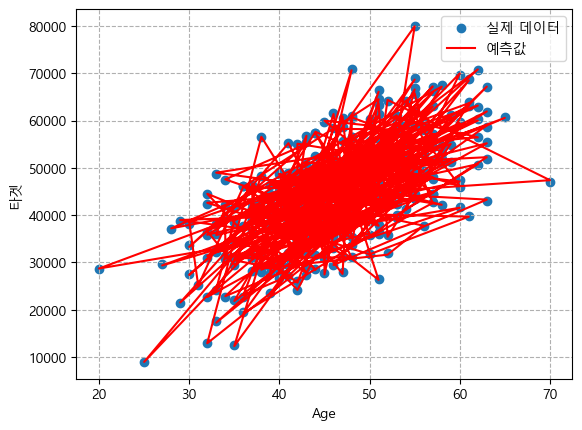

In [24]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 테스트 데이터에 대한 예측값 계산
y_pred = l_r.predict(X_train)

# 산점도 그래프 그리기
plt.scatter(X_train.iloc[:, 0], y_train, label='실제 데이터')
plt.plot(X_train.iloc[:, 0], y_pred, color='red', label='예측값')

plt.xlabel('Age')
plt.ylabel('타겟')
plt.legend()
plt.grid(visible=True, linestyle='--')
plt.show()


In [39]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

features, targets = df.iloc[:, :-1], df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)
print('W1: {:.4f}, W2: {:.4f}, , W3: {:.4f}, b: {:.4f}'.format(l_r.coef_[0],l_r.coef_[1],l_r.coef_[2], l_r.intercept_))

W1: 839.5635, W2: 0.5613, , W3: 0.0289, b: -41939.7325


In [40]:
from sklearn.metrics import mean_squared_error

prediction = l_r.predict(X_test)
print('MSE loss: {:.4f}, RMSE loss: {:.4f}'\
      .format(mean_squared_error(y_test, prediction), 
      np.sqrt(mean_squared_error(y_test, prediction))))

MSE loss: 55726.6310, RMSE loss: 236.0649


In [37]:
H = 839.5635 * X_test1 + 0.5613 * X_test2 + 0.0289 * X_test3 - 41939.7325
loss = torch.mean((y_test - H) ** 2)
print(loss.item())

55650.33984375
